In [ ]:
#Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset
from google.colab import drive
import torchvision.models as models
from torchvision import transforms, datasets, models
from torch import nn, optim




In [ ]:
import os
import csv
###PATH.PY FOR CSV FILE
#To Extract all the Videos and there Paths and save them into a csv for Pandas to reload
from google.colab import drive
drive.mount("/content/gdrive")

os.chdir("/content/gdrive/MyDrive/FYP")
print(os.listdir(os.getcwd()))
def image():
    imglbl = []
    imgPath = []
    tempPath = []
    imgFrm = []
    
    path = os.getcwd()
    print(path)
    newPath = "trainData/val_Samples"
    newPath = os.path.join(path, newPath)
    os.chdir(newPath)

    dirLen = len(os.listdir())
    imglbl.append(os.listdir())    
    os.chdir(path)

    with open('valCSV.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(["Image_Label", "Image_Frames", "Image_Path"])
        for i in range(dirLen):
            x = imglbl[0][i]
            customPath = os.path.join(newPath, str(x))
            os.chdir(customPath)
            y = (os.listdir())
            for j in range(len(y)):
                imgPath.append(customPath + '/' + y[j])
                tempPath.append(imgPath[-1])
                os.chdir(tempPath[-1])
                imgFrm.append(len(os.listdir())-1)                
                writer.writerow([str(imglbl[0][i]), imgFrm[-1], imgPath[-1]])
image()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['trainData', 'tensors.npy', 'labels.npy', 'myCSV.csv', 'clrtensors.npy', 'clrlabels.npy', 'xclrtensors.npy', 'xclrlabels.npy', 'x112clrtensors.npy', 'x112clrlabels.npy']
/content/gdrive/MyDrive/FYP


In [ ]:
## To Create NPY Files to load data
## After Loading the data , its saved to numpy files for quick load in memory. Manual data load = 6-8 hours, Npy file data load = 15 minutes

import numpy as np
from sklearn import preprocessing
os.chdir("/content/gdrive/MyDrive/FYP")

le = preprocessing.LabelEncoder()
le.fit(labelList)
labels = le.transform(labelList)
print(labels)
tensors = [t.numpy() for t in tensorList]

np.save("xfclrtensors",tensors)
np.save("xfclrlabels",labels)




[0 0 0 0 2 2 2 2 1 1 1 1 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 7 7 7 7 7 7 6 6 6 6]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
#To Mount Google Drive
drive.mount("/content/gdrive")
os.chdir("/content/gdrive/MyDrive/FYP")

Mounted at /content/gdrive


In [ ]:
#DATA LOADER MD 4
#Change Directory
os.chdir("/content/gdrive/MyDrive/FYP")
print(os.getcwd())

#Read CSV File
df = pd.read_csv('myCSV.csv')
#Get CSV File Length
dfLen = len(df.index)+1

#Arrays Declarations
tensorList = []
labelList = []
label = ""

#Get Img Labels
imglblList = []
for column in df[['Image_Label']]:
    imglbl = df[column]
for i in imglbl.values:
    imglblList.append(i)

#Get Img Frames    
imgFramesList = []
for column in df[['Image_Frames']]:
    imgFrames = df[column]
for i in imgFrames.values:
    imgFramesList.append(i)
    
#Get Img Path
imgPathList = []
for column in df[['Image_Path']]:
    imgPath = df[column]
for i in imgPath.values:
    imgPathList.append(i)

X = df.Image_Path.values
y = df.Image_Label.values





/content/gdrive/MyDrive/FYP


In [ ]:
######################################### TO LOAD IMAGES FROM THEIR PATH ##################################################
trans = transforms.Compose([ transforms.ToTensor(),
                                                 transforms.Normalize(mean=[0.5], std=[0.5])])

#Open, Resize and Transform Images
def loader(imglbl, imgPath, imgFrames):
        tensorArr=[]
        imgDir = os.chdir(imgPath)
        print(imglbl)
        print(imgPath)
        print(imgFrames)
        print("=------------------------------------------------------------------------------------------=")
        for x in range(imgFrames):
            image = Image.open('frame'+str(x)+'.jpg')
            new_image = image.resize((32, 32))
            new_image2 = trans(new_image)
            tensorArr.append(new_image2)
        
        label = imglbl    
        return tensorArr, new_image2, label

#Image output and labels from loader will be stacked into a tensor
print(imglblList)

for i in range(dfLen-1):
    #Function call to loader
    tensorArr,x , label = loader(imglblList[i], imgPathList[i], imgFramesList[i])

    stackTensor = torch.stack(tensorArr)
    
    #Numpy Array of the TensorList
    tensorList.append(stackTensor)
    
    #Numpy Array of the LabelList
    labelList.append(label)

#Intialise signData class

#testloader = torch.utils.data.DataLoader(combList, batch_size=32, shuffle=False)


['a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'a lot', 'a lot', 'a lot', 'a lot', 'able', 'able', 'able', 'able', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'above', 'above', 'above', 'accept', 'accept', 'accept', 'accept', 'accept', 'accept', 'accent', 'accent', 'accent', 'accent']
a
/content/gdrive/MyDrive/FYP/trainData/Samples/a/01611.mp4
48
=------------------------------------------------------------------------------------------=
a
/content/gdrive/MyDrive/FYP/trainData/Samples/a/01614.mp4
65
=------------------------------------------------------------------------------------------=
a
/content/gdrive/MyDrive/FYP/trainData/Samples/a/01615.mp4
84
=------------------------------------------------------------------------------------------=
a
/content/gdrive/MyDrive/FYP/trainData/Samples/a/01610.mp4
124
=------------------------------------------------------------------------------------------=
abdomen
/content/gdrive/MyDrive/FYP/trainDa

In [ ]:
import numpy as np
os.chdir("/content/gdrive/MyDrive/FYP")
tensorList = np.load('xfclrtensors.npy',allow_pickle=True)
labels = np.load('xfclrlabels.npy',allow_pickle=True)
vtensorList = np.load('vclrtensors.npy',allow_pickle=True)
vlabels = np.load('Vclrlabels.npy',allow_pickle=True)

trainData = torch.utils.data.random_split(tensorList, [28, 9], generator=torch.Generator().manual_seed(42))
print(trainData[0])

In [ ]:
os.chdir("/content/gdrive/MyDrive/FYP/trainData/Samples")
import torch.nn.utils.rnn as rnn
#Custom Dataloader
class signData(Dataset):
    def __init__(self, X, Y, transform = None):
        #X is TensorList as argument
        self.X = X
        #Y is LabelList as argument
        self.Y = Y
        
        if transform == 1:
            self.transform = transforms.Compose([ transforms.ToTensor(),
                                                 transforms.Normalize(mean=[0.5], std=[0.5])])
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self,index):
        #Accessing every instance of NpTensorArr
        imageStack = self.X[index]
        #Accesing every instance of NpLabelList
        label = self.Y[index]
        return torch.from_numpy(imageStack), len(imageStack), label 
max=0
for i in (tensorList):
  x =i.shape[0]
  if (x>max):
    max = x
#Use my_collate for Image Batching and normalizing image sizes
def my_collate(batch):
    inputs = rnn.pad_sequence([s[0] for s in batch], padding_value=0.0)
    input_sizes = torch.LongTensor([s[1] for s in batch])
    target = torch.LongTensor([s[2] for s in batch])

    #data = [item[0] for item in batch]
    #print(len(data))
    #for i in (data):
    #  print(i)
      
    #data_size = torch.LongTensor(data)
    #target = [item[1] for item in batch]
    #target_size = torch.LongTensor(target)
    return inputs, input_sizes, target    



#Transform Images
trans = transforms.Compose([ transforms.ToTensor(),
                                                 transforms.Normalize(mean=[0.5], std=[0.5])])



In [ ]:
## Encoder for turning the words into a unique identifier number
le = preprocessing.LabelEncoder()
le.fit(labelList)
labels = le.transform(labelList)

In [ ]:
##  Spliting Data into Training and Validation data
Data = signData(trainData[0], labels, transform=1)
val_Data= signData(vtensorList, vlabels, transform=1)

train_arg = dict(batch_size=2, shuffle=True, collate_fn = my_collate) 
train_loader = DataLoader(Data, **train_arg)

val_loader = DataLoader(val_Data, **train_arg)



'\nclass Model(nn.Module):\n    def __init__(self):\n        super(Model, self).__init__()\n        self.model = torchvision.models.video.r2plus1d_18(pretrained=True, progress=True)\n    def forward(self, X, lengths):\n        packed_X = rnn.pack_padded_sequence(X, lengths, enforce_sorted=False)\n        packed_out = self.model(packed_X)\n        out = rnn.pad_packed_sequence(packed_out)\n        print(out)\n        \nmodel = Model()\n#model = torchvision.models.video.r2plus1d_18(pretrained=True, progress=True)\n#criterion = nn.CrossEntropyLoss()\n#optimizer = optim.SGD(model.fc.parameters(), lr=0.001 , momentum=0.9)'

In [ ]:
## Loading Resnet 2+1 D model

model = torchvision.models.video.r2plus1d_18(pretrained=True, progress=True)
criterion = nn.CrossEntropyLoss()

lr=0.1
weight_decay=0.1
factor=0.316
patience=5

device = "cuda" if torch.cuda.is_available() else "cpu"
import torch
torch.cuda.empty_cache()
import gc 

# Your code with pytorch using GPU 
optimizer = torch.optim.Adam(model.parameters(),lr=lr*factor, weight_decay=weight_decay)
torch.cuda.memory_summary(device=None, abbreviated=False)

model.to(device)
criterion.to(device)

def train(n_epochs, model, optimizer, criterion):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, dsize, target) in enumerate(train_loader):
          #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
          data, target = data.to(device), target.to(device)
          # initialize weights to zero
          
          data = data.permute(1,2,0,3,4)
          optimizer.zero_grad()
          
          output = model(data)
            
            # calculate loss
          loss = criterion(output, target)
          train_loss += loss.item() 
            # back prop
          loss.backward()
            
            # grad
          optimizer.step()
            
        train_loss /= len(train_loader)
            
        print('Training loss: %.3f' %(train_loss))
        with torch.no_grad():
          model.eval()
          val_loss = 0
          batch_id=0
          for X, X_lens, Y in val_loader:
            batch_id+=1
            X = X.permute(1,2,0,3,4)
            X = X.to(device)
            Y = Y.to(device)
            out = model(X)
            loss = criterion(out, Y)
            val_loss+=loss.item()
        val_lpw = val_loss / batch_id
        print('Validation Loss: ', val_lpw)
    return train_loss, val_lpw

gc.collect()
#train(25, model, optimizer, criterion)

292

In [ ]:
from tqdm import tqdm
Train_loss = []
Test_loss = []
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=patience, factor=factor, verbose=True)
for i in tqdm(range(60)):
    train_loss, val_loss = train(1,model,  optimizer, criterion)
    scheduler.step(val_loss)
    Train_loss.append(train_loss)
    Test_loss.append(val_loss)


  0%|          | 0/60 [00:00<?, ?it/s]

Training loss: 8.599


  2%|▏         | 1/60 [00:02<02:34,  2.61s/it]

Validation Loss:  4.487902800242106
Training loss: 4.286


  3%|▎         | 2/60 [00:04<02:26,  2.53s/it]

Validation Loss:  4.213518699010213
Training loss: 2.986


  5%|▌         | 3/60 [00:07<02:22,  2.50s/it]

Validation Loss:  4.620006322860718
Training loss: 2.890


  7%|▋         | 4/60 [00:09<02:19,  2.48s/it]

Validation Loss:  5.730101267496745
Training loss: 2.879


  8%|▊         | 5/60 [00:12<02:14,  2.45s/it]

Validation Loss:  2.80696173508962
Training loss: 2.688


 10%|█         | 6/60 [00:14<02:11,  2.44s/it]

Validation Loss:  3.022490978240967
Training loss: 2.732


 12%|█▏        | 7/60 [00:17<02:08,  2.42s/it]

Validation Loss:  3.2350165843963623
Training loss: 2.669


 13%|█▎        | 8/60 [00:19<02:06,  2.43s/it]

Validation Loss:  2.920980215072632
Training loss: 2.912


 15%|█▌        | 9/60 [00:21<02:03,  2.42s/it]

Validation Loss:  3.2988585035006204
Training loss: 2.888


 17%|█▋        | 10/60 [00:24<02:01,  2.43s/it]

Validation Loss:  2.824938158194224
Training loss: 2.636


 18%|█▊        | 11/60 [00:26<01:57,  2.40s/it]

Validation Loss:  3.1404534180959067
Epoch    11: reducing learning rate of group 0 to 9.9856e-03.
Training loss: 2.611


 20%|██        | 12/60 [00:29<01:54,  2.39s/it]

Validation Loss:  2.8888491789499917
Training loss: 2.204


 22%|██▏       | 13/60 [00:31<01:53,  2.41s/it]

Validation Loss:  2.8673296372095742
Training loss: 2.192


 23%|██▎       | 14/60 [00:33<01:49,  2.38s/it]

Validation Loss:  2.777952035268148
Training loss: 2.237


 25%|██▌       | 15/60 [00:36<01:47,  2.39s/it]

Validation Loss:  2.736890653769175
Training loss: 2.177


 27%|██▋       | 16/60 [00:38<01:44,  2.37s/it]

Validation Loss:  2.749085088570913
Training loss: 2.135


 28%|██▊       | 17/60 [00:40<01:41,  2.37s/it]

Validation Loss:  2.7886096239089966
Training loss: 2.145


 30%|███       | 18/60 [00:43<01:39,  2.36s/it]

Validation Loss:  2.74166472752889
Training loss: 2.168


 32%|███▏      | 19/60 [00:45<01:36,  2.36s/it]

Validation Loss:  2.7677613496780396
Training loss: 2.161


 33%|███▎      | 20/60 [00:47<01:34,  2.37s/it]

Validation Loss:  2.776060183842977
Training loss: 2.235


 35%|███▌      | 21/60 [00:50<01:33,  2.40s/it]

Validation Loss:  2.7194963892300925
Training loss: 2.233


 37%|███▋      | 22/60 [00:52<01:31,  2.41s/it]

Validation Loss:  2.8205746014912925
Training loss: 2.151


 38%|███▊      | 23/60 [00:55<01:29,  2.42s/it]

Validation Loss:  2.7619023521741233
Training loss: 2.137


 40%|████      | 24/60 [00:57<01:26,  2.42s/it]

Validation Loss:  2.7826995849609375
Training loss: 2.201


 42%|████▏     | 25/60 [01:00<01:24,  2.41s/it]

Validation Loss:  2.8992547591527305
Training loss: 2.194


 43%|████▎     | 26/60 [01:02<01:22,  2.44s/it]

Validation Loss:  2.7241808772087097
Training loss: 2.192


 45%|████▌     | 27/60 [01:04<01:19,  2.42s/it]

Validation Loss:  2.725903312365214
Epoch    27: reducing learning rate of group 0 to 3.1554e-03.
Training loss: 2.083


 47%|████▋     | 28/60 [01:07<01:17,  2.42s/it]

Validation Loss:  2.7378953099250793
Training loss: 2.059


 48%|████▊     | 29/60 [01:09<01:14,  2.42s/it]

Validation Loss:  2.7725725571314492
Training loss: 2.067


 50%|█████     | 30/60 [01:12<01:12,  2.42s/it]

Validation Loss:  2.7581374247868857
Training loss: 2.059


 52%|█████▏    | 31/60 [01:14<01:10,  2.43s/it]

Validation Loss:  2.733346780141195
Training loss: 2.056


 53%|█████▎    | 32/60 [01:17<01:08,  2.44s/it]

Validation Loss:  2.7558658917744956
Training loss: 2.063


 55%|█████▌    | 33/60 [01:19<01:05,  2.43s/it]

Validation Loss:  2.7647989988327026
Epoch    33: reducing learning rate of group 0 to 9.9712e-04.
Training loss: 2.045


 57%|█████▋    | 34/60 [01:21<01:02,  2.42s/it]

Validation Loss:  2.7558236718177795
Training loss: 2.043


 58%|█████▊    | 35/60 [01:24<01:00,  2.41s/it]

Validation Loss:  2.7456993659337363
Training loss: 2.041


 60%|██████    | 36/60 [01:26<00:58,  2.44s/it]

Validation Loss:  2.744540731112162
Training loss: 2.040


 62%|██████▏   | 37/60 [01:29<00:56,  2.45s/it]

Validation Loss:  2.75199286142985
Training loss: 2.038


 63%|██████▎   | 38/60 [01:31<00:53,  2.45s/it]

Validation Loss:  2.738188942273458
Training loss: 2.034


 65%|██████▌   | 39/60 [01:34<00:51,  2.46s/it]

Validation Loss:  2.755029837290446
Epoch    39: reducing learning rate of group 0 to 3.1509e-04.
Training loss: 2.026


 67%|██████▋   | 40/60 [01:36<00:49,  2.47s/it]

Validation Loss:  2.7499859730402627
Training loss: 2.026


 68%|██████▊   | 41/60 [01:39<00:46,  2.46s/it]

Validation Loss:  2.7542331218719482
Training loss: 2.026


 70%|███████   | 42/60 [01:41<00:43,  2.42s/it]

Validation Loss:  2.749900499979655
Training loss: 2.025


 72%|███████▏  | 43/60 [01:44<00:41,  2.45s/it]

Validation Loss:  2.750028888384501
Training loss: 2.028


 73%|███████▎  | 44/60 [01:46<00:39,  2.45s/it]

Validation Loss:  2.7459855874379477
Training loss: 2.025


 75%|███████▌  | 45/60 [01:48<00:36,  2.45s/it]

Validation Loss:  2.747590740521749
Epoch    45: reducing learning rate of group 0 to 9.9569e-05.
Training loss: 2.024


 77%|███████▋  | 46/60 [01:51<00:34,  2.45s/it]

Validation Loss:  2.7479258378346763
Training loss: 2.024


 78%|███████▊  | 47/60 [01:53<00:31,  2.43s/it]

Validation Loss:  2.7477511962254844
Training loss: 2.023


 80%|████████  | 48/60 [01:56<00:29,  2.43s/it]

Validation Loss:  2.7471057176589966
Training loss: 2.023


 82%|████████▏ | 49/60 [01:58<00:26,  2.44s/it]

Validation Loss:  2.748264710108439
Training loss: 2.024


 83%|████████▎ | 50/60 [02:01<00:24,  2.44s/it]

Validation Loss:  2.7465616861979165
Training loss: 2.023


 85%|████████▌ | 51/60 [02:03<00:21,  2.42s/it]

Validation Loss:  2.7471350034077964
Epoch    51: reducing learning rate of group 0 to 3.1464e-05.
Training loss: 2.022


 87%|████████▋ | 52/60 [02:05<00:19,  2.43s/it]

Validation Loss:  2.747097373008728
Training loss: 2.022


 88%|████████▊ | 53/60 [02:08<00:16,  2.42s/it]

Validation Loss:  2.747070829073588
Training loss: 2.022


 90%|█████████ | 54/60 [02:10<00:14,  2.40s/it]

Validation Loss:  2.7470774253209433
Training loss: 2.023


 92%|█████████▏| 55/60 [02:13<00:12,  2.41s/it]

Validation Loss:  2.7467209895451865
Training loss: 2.022


 93%|█████████▎| 56/60 [02:15<00:09,  2.42s/it]

Validation Loss:  2.7467546463012695
Training loss: 2.022


 95%|█████████▌| 57/60 [02:18<00:07,  2.42s/it]

Validation Loss:  2.7467970053354898
Epoch    57: reducing learning rate of group 0 to 9.9425e-06.
Training loss: 2.022


 97%|█████████▋| 58/60 [02:20<00:04,  2.44s/it]

Validation Loss:  2.7467641830444336
Training loss: 2.022


 98%|█████████▊| 59/60 [02:22<00:02,  2.44s/it]

Validation Loss:  2.746721307436625
Training loss: 2.022


100%|██████████| 60/60 [02:25<00:00,  2.42s/it]

Validation Loss:  2.746853987375895


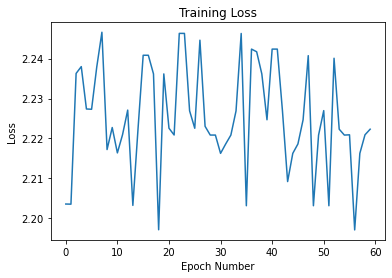

In [ ]:
plt.title('Training Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Train_loss)

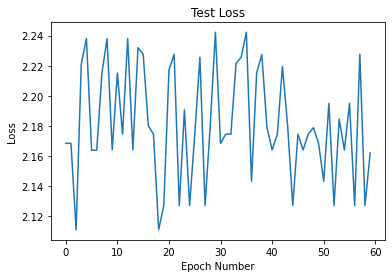

In [ ]:
plt.title('Test Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Test_loss)